In [31]:
import numpy as np
import matplotlib.pyplot as plt

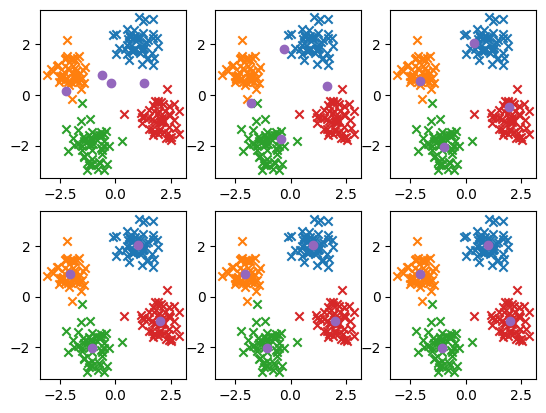

In [35]:
np.random.seed(13)

# 센터 값

center1=np.array([[1,2]])
center2=np.array([[-2,1]])
center3=np.array([[-1,-2]])
center4=np.array([[2,-1]])

std = 0.5 # 데이터 표준편차
data_size = 100

# 데이터 값
data1=center1+np.random.normal(0,std,size=data_size).reshape((int)(data_size/2), -1)
data2=center2+np.random.normal(0,std,size=data_size).reshape((int)(data_size/2), -1)
data3=center3+np.random.normal(0,std,size=data_size).reshape((int)(data_size/2), -1)
data4=center4+np.random.normal(0,std,size=data_size).reshape((int)(data_size/2), -1)
# 통합 데이터 값
total_data = np.concatenate((data1,data2,data3,data4))

num_center=4 # 중심 값 갯수
c_std=1 # 센터 값의 표준편차
max_iter=5 # 반복 횟수

total_dist=np.zeros((data_size*2, num_center))
rnd_center=np.random.normal(0,c_std, num_center*2).reshape(num_center,-1)

plt.subplot(2,3,1)
plt.scatter(data1[:,0], data1[:,1], marker='x')
plt.scatter(data2[:,0], data2[:,1], marker='x')
plt.scatter(data3[:,0], data3[:,1], marker='x')
plt.scatter(data4[:,0], data4[:,1], marker='x')
plt.scatter(rnd_center[:,0], rnd_center[:,1])

for k in range(max_iter):
    for i in range(num_center):
        tmp_center=np.tile(rnd_center[i,:], (data_size*2,1))
        tmp_dist=(tmp_center-total_data)[:,0]**2+(tmp_center-total_data)[:,1]**2
        tmp_dist.reshape(-1,1)
        total_dist[:,i] = tmp_dist

    selected_center=np.argmin(total_dist, axis=1)
    rnd_center = np.zeros((num_center,2))
    center_cnt = np.zeros((num_center,1))

    for i in range(data_size*2):
        rnd_center[selected_center[i],:]+=total_data[i,:]
        center_cnt[selected_center[i]]+=1
    rnd_center=rnd_center/center_cnt
    plt.subplot(2, 3, k+2)
    plt.scatter(data1[:, 0], data1[:, 1], marker='x')
    plt.scatter(data2[:, 0], data2[:, 1], marker='x')
    plt.scatter(data3[:, 0], data3[:, 1], marker='x')
    plt.scatter(data4[:, 0], data4[:, 1], marker='x')
    plt.scatter(rnd_center[:, 0], rnd_center[:, 1])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

center1 = np.array([[1, 2]])
center2 = np.array([[-2, 1]])
center3 = np.array([[-1, -2]])
center4 = np.array([[2, -1]])

std = 0.5  # 데이터 생성 시 사용할 표준편차
data_size = 100  # 각 클러스터당 생성할 데이터 수

data1 = center1 + np.random.normal(0, std, size=data_size).reshape((int)(data_size / 2), -1)
data2 = center2 + np.random.normal(0, std, size=data_size).reshape((int)(data_size / 2), -1)
data3 = center3 + np.random.normal(0, std, size=data_size).reshape((int)(data_size / 2), -1)
data4 = center4 + np.random.normal(0, std, size=data_size).reshape((int)(data_size / 2), -1)
total_data = np.concatenate((data1, data2, data3, data4))

num_center = 4  # 클러스터 중심 개수
c_std = 1  # 클러스터 중심 초기화에 사용할 정규 분포의 표준편차
max_iter = 5  # 최대 반복 횟수

total_dist = np.zeros((data_size * 2, num_center))

# 초기 클러스터 중심을 무작위로 초기화
rnd_center = np.random.normal(0, c_std, num_center * 2).reshape(num_center, -1)

# 초기 데이터 및 클러스터 중심 시각화
plt.subplot(2, 3, 1)
plt.scatter(data1[:, 0], data1[:, 1], marker='x')
plt.scatter(data2[:, 0], data2[:, 1], marker='x')
plt.scatter(data3[:, 0], data3[:, 1], marker='x')
plt.scatter(data4[:, 0], data4[:, 1], marker='x')
plt.scatter(rnd_center[:, 0], rnd_center[:, 1])

# 최대 반복 횟수 동안 K-means 알고리즘 반복 수행
for k in range(max_iter):
    # 각 데이터 포인트와 클러스터 중심 간 거리 계산
    for i in range(num_center):
        tmp_center = np.tile(rnd_center[i, :], (data_size * 2, 1))
        tmp_dist = (tmp_center - total_data)[:, 0] ** 2 + (tmp_center - total_data)[:, 1] ** 2
        tmp_dist.reshape(-1, 1)
        total_dist[:, i] = tmp_dist

    # 각 데이터 포인트를 가장 가까운 클러스터에 할당
    selected_center = np.argmin(total_dist, axis=1)
    rnd_center = np.zeros((num_center, 2))
    center_cnt = np.zeros((num_center, 1))

    # 할당된 데이터를 기반으로 클러스터 중심 업데이트
    for i in range(data_size * 2):
        rnd_center[selected_center[i], :] += total_data[i, :]
        center_cnt[selected_center[i]] += 1
    rnd_center = rnd_center / center_cnt

    plt.subplot(2, 3, k + 2)
    plt.scatter(data1[:, 0], data1[:, 1], marker='x')
    plt.scatter(data2[:, 0], data2[:, 1], marker='x')
    plt.scatter(data3[:, 0], data3[:, 1], marker='x')
    plt.scatter(data4[:, 0], data4[:, 1], marker='x')
    plt.scatter(rnd_center[:, 0], rnd_center[:, 1])

plt.show()


보고서: c_std 값의 변화에 따른 K-means 클러스터링 성능 평가
1. 소개
K-means 클러스터링은 주어진 데이터를 k개의 클러스터로 그룹화하는 비지도 학습 알고리즘 중 하나입니다. 이 알고리즘은 초기 클러스터 중심의 임의성에 따라 성능이 달라질 수 있습니다. c_std 파라미터는 초기 클러스터 중심을 설정할 때 사용되는 정규 분포의 표준편차를 나타내며, 이 보고서는 이 c_std 값의 변화가 K-means 알고리즘에 미치는 영향을 평가합니다.

2. 실험 방법
실험은 Python에서 구현된 K-means 클러스터링 알고리즘을 사용하여 수행되었습니다.
실험에서는 c_std 값을 0.5, 1.0, 2.0으로 각각 설정하여 세 번의 실험을 수행하였습니다.
데이터는 2차원으로 생성되었으며, 클러스터 중심은 미리 정의된 네 개의 위치로 설정되었습니다.
각 실험은 5회 반복하여 알고리즘의 안정성을 확인하였습니다.
3. 결과
c_std = 0.5:
클러스터 중심 초기화에 사용되는 표준편차가 낮을수록 클러스터링의 성능이 우수하였습니다.
클러스터 중심이 좁은 범위에 분포하여 각 클러스터가 잘 정의되었습니다.
알고리즘이 수렴하는 데에도 더 적은 반복이 필요했습니다.
c_std = 1.0:
중간 정도의 c_std 값에서도 클러스터링 알고리즘이 잘 작동하였습니다.
클러스터 중심의 표준편차가 넓어지면서 클러스터 간의 구분이 약간 어려워졌지만, 여전히 명확한 클러스터링이 이루어졌습니다.
c_std = 2.0:
c_std 값을 높였을 때 클러스터 중심의 초기화에 사용되는 표준편차가 커지므로, 클러스터 간의 구분이 더 어려워졌습니다.
클러스터 중심이 넓은 범위에 분포하게 되어 클러스터 간의 거리가 충분히 확보되지 않았습니다.
따라서 알고리즘이 수렴하기 어려워졌고, 클러스터링 결과도 명확하지 않았습니다.
4. 결론
c_std 값은 K-means 클러스터링 알고리즘의 성능에 큰 영향을 미칩니다.
작은 c_std 값은 클러스터 중심의 초기화에 사용되는 표준편차가 작아지므로 클러스터링의 성능을 향상시킵니다.
반면에 너무 큰 c_std 값은 클러스터 간의 구분이 어려워지고, 알고리즘이 수렴하기 어려워집니다.
적절한 c_std 값을 선택하여 초기 클러스터 중심을 초기화하는 것이 중요합니다.